In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

              benchmarks         rss  shared-clean  shareable anon  \
0       110.dynamic-html   25.105469      8.648438        0.308594   
1        210.thumbnailer   25.992188      8.949219        0.261719   
2  411.image-recognition  300.128906     10.078125       81.992188   
3  504.dna-visualisation   52.570312      9.226562        0.238281   

   shareable file-backed  not shareable  
0              -0.007812      16.156250  
1               1.156250      15.625000  
2              37.441406     170.617188  
3               5.921875      37.183594  
              benchmarks         rss  shared-clean  shareable anon  \
0       110.dynamic-html   25.386719      8.871094        0.828125   
1        210.thumbnailer   26.097656      9.035156        1.207031   
2  411.image-recognition  300.148438     10.417969      100.523438   
3  504.dna-visualisation   46.839844      8.828125        0.996094   

   shareable file-backed  not shareable  
0               0.742188      14.945312  
1   

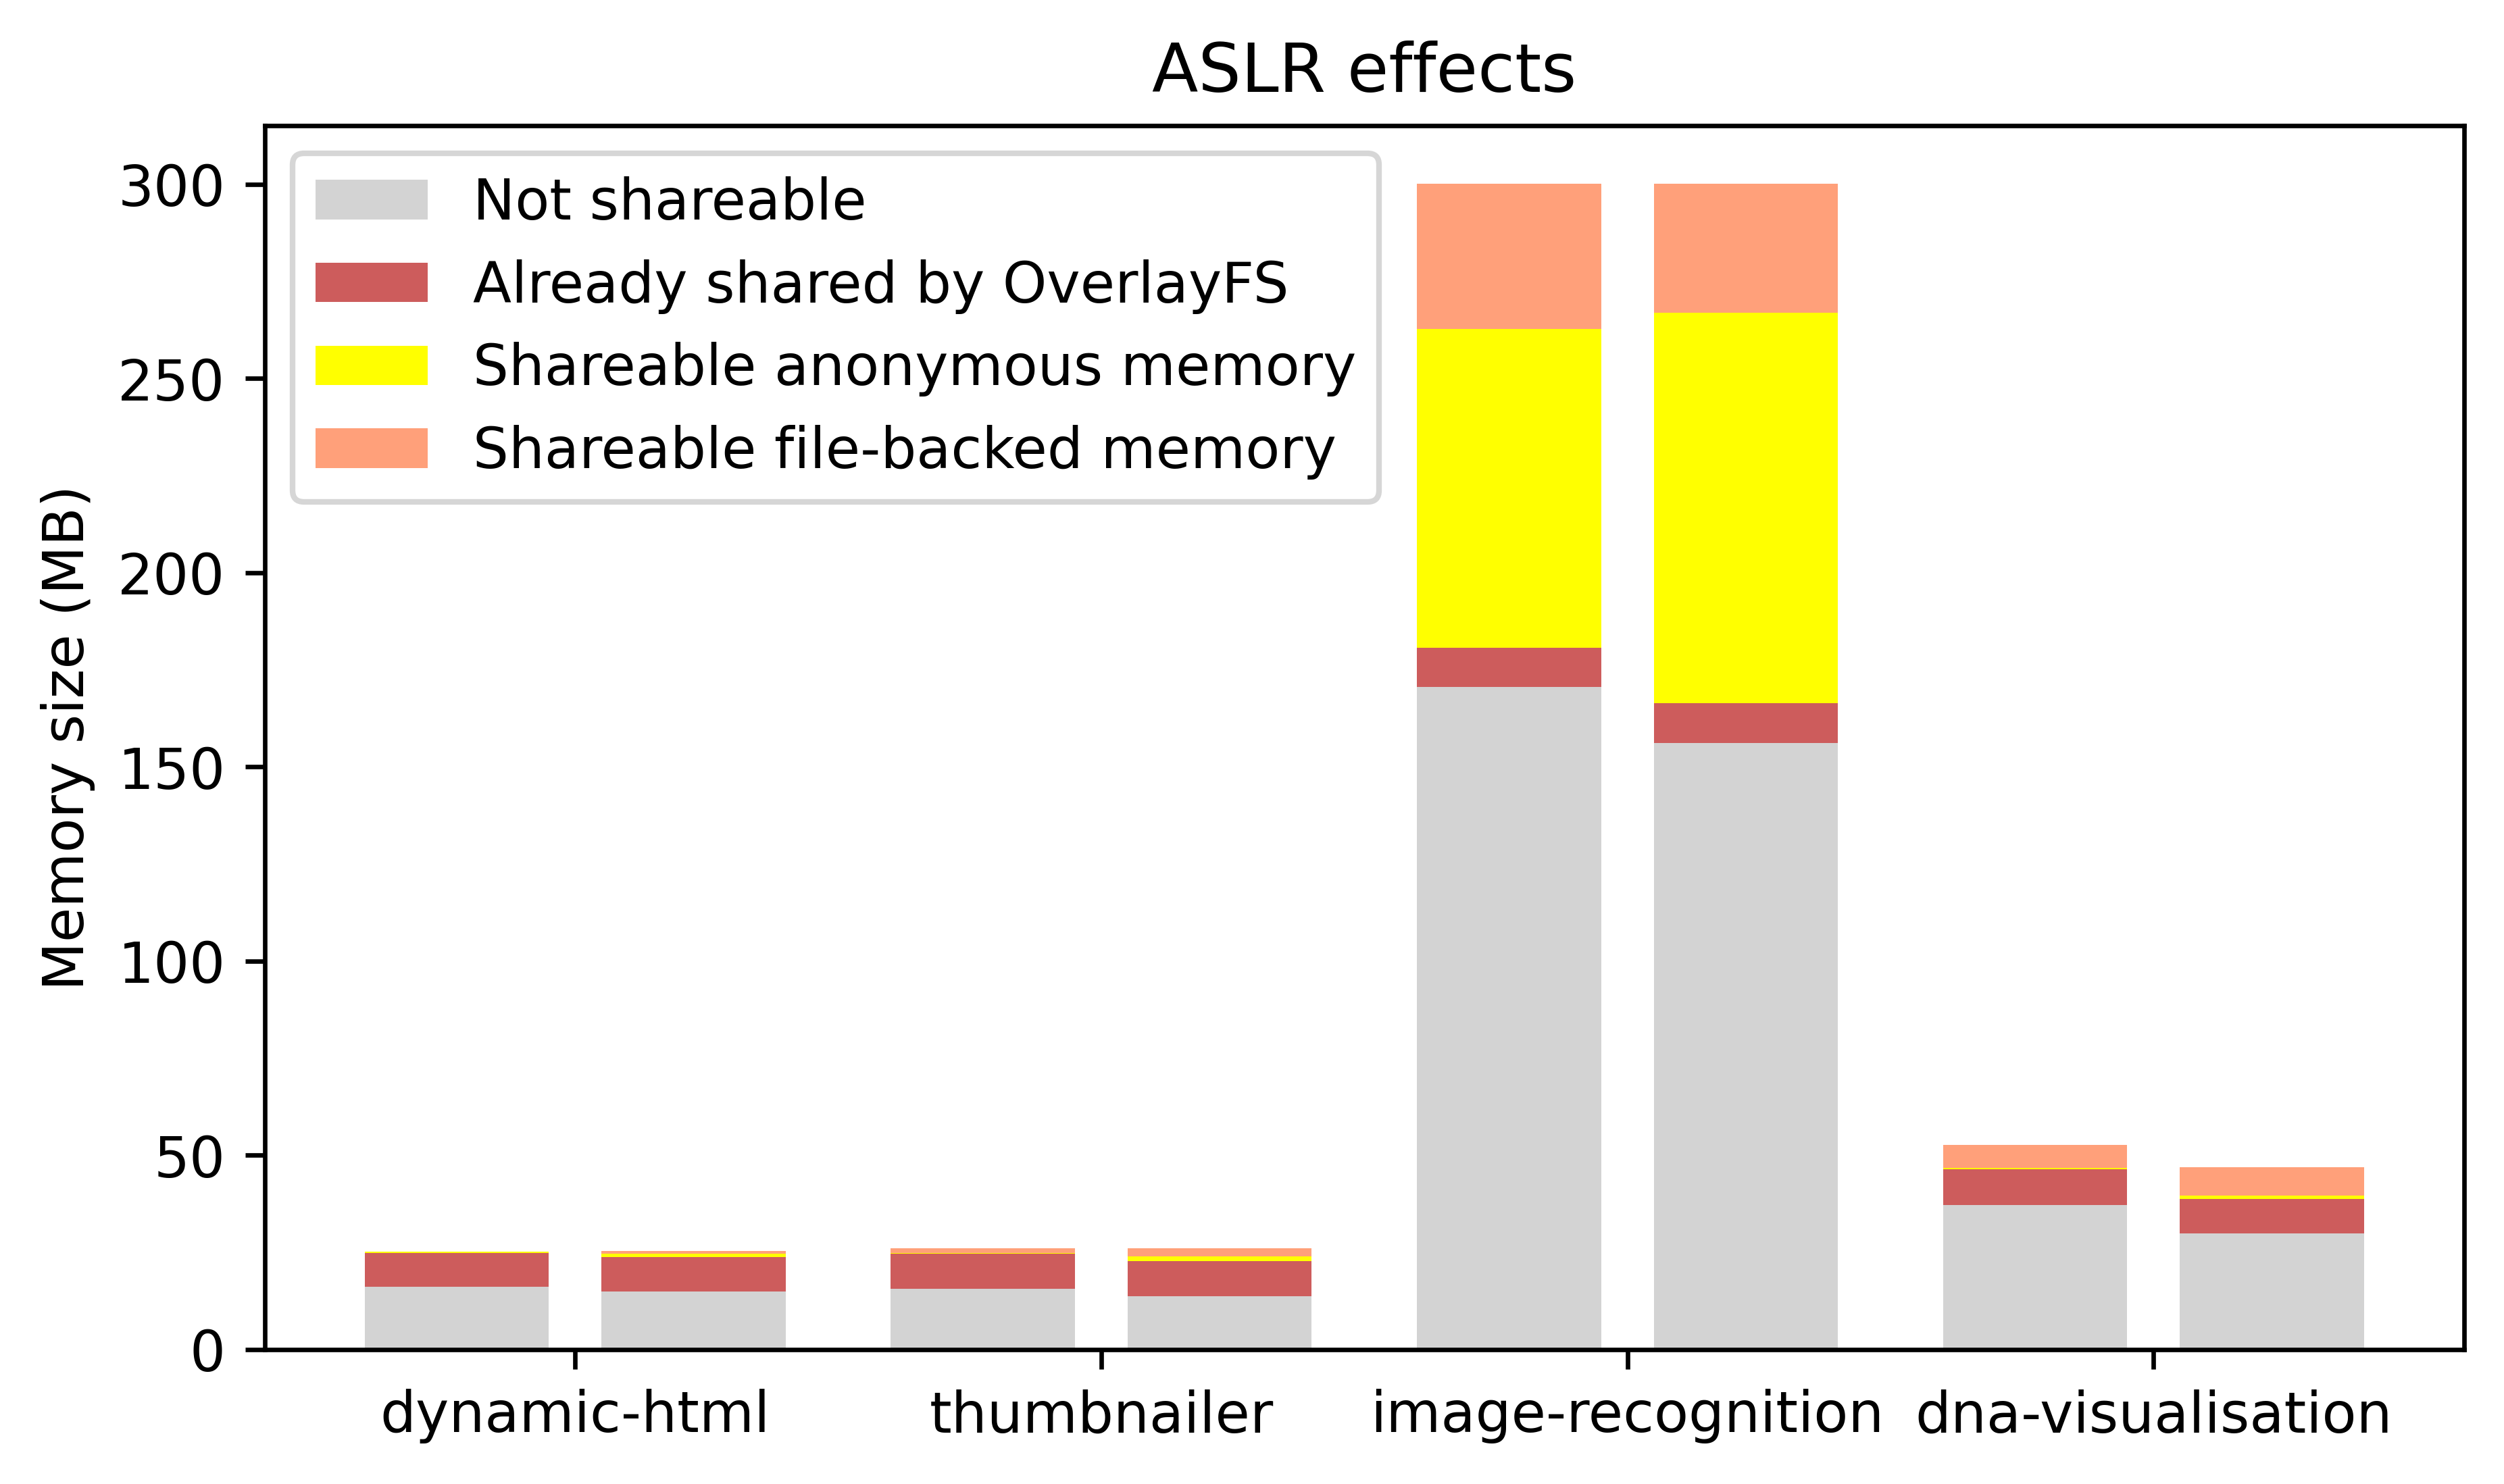

In [4]:
x = ["ASLR enabled", "ASLR disabled"]
# benchmarks = ["110.dynamic-html", "210.thumbnailer", "411.image-recognition"]

aslr1_data = []
aslr0_data = []

bar_width = 0.4

aslr1_df = pd.read_csv("/data/aslr1_share.csv")
# aslr1_df = aslr1_df.iloc[0:2]

# aslr1_df = aslr1_df.iloc[2]
print (aslr1_df)

aslr0_df = pd.read_csv("/data/aslr0_share.csv")
# aslr0_df = aslr0_df.iloc[0:2]
# aslr0_df = aslr0_df.iloc[2]

print (aslr0_df)

print (aslr0_df["benchmarks"])

benchmarks = pd.Series(aslr1_df["benchmarks"]).str.slice(start=4)

# benchmarks = aslr0_df["benchmarks"]

index = np.arange(len(benchmarks))

plt.figure(figsize=(7,4))
plt.bar(index, aslr1_df["not shareable"], bar_width - 0.05, color = "lightgrey", label="Not shareable")
plt.bar(index, aslr1_df["shared-clean"], bar_width - 0.05, color = "indianred", bottom = aslr1_df["not shareable"], label="Already shared by OverlayFS")
plt.bar(index, aslr1_df["shareable anon"], bar_width - 0.05, color = "yellow", bottom = aslr1_df["shared-clean"] + aslr1_df["not shareable"], label="Shareable anonymous memory")
plt.bar(index, aslr1_df["shareable file-backed"], bar_width - 0.05, color = "lightsalmon", bottom = aslr1_df["shared-clean"] + aslr1_df["not shareable"] + aslr1_df["shareable anon"], label = "Shareable file-backed memory")

plt.bar(index + bar_width + 0.05, aslr0_df["not shareable"], bar_width - 0.05, color = "lightgrey")
plt.bar(index + bar_width + 0.05, aslr0_df["shared-clean"], bar_width - 0.05, color = "indianred", bottom = aslr0_df["not shareable"])
plt.bar(index + bar_width + 0.05, aslr0_df["shareable anon"], bar_width - 0.05, color = "yellow", bottom = aslr0_df["shared-clean"] + aslr0_df["not shareable"])
plt.bar(index + bar_width + 0.05, aslr0_df["shareable file-backed"], bar_width - 0.05, color = "lightsalmon", bottom = aslr0_df["shared-clean"] + aslr0_df["not shareable"] + aslr0_df["shareable anon"])


# plt.bar(index + bar_width + 0.05, aslr0_df["not shareable"], bar_width - 0.05, color = "lightgrey", label="Not shareable")
# plt.bar(index + bar_width + 0.05, aslr0_df["shared-clean"], bar_width - 0.05, color = "indianred", bottom = aslr0_df["not shareable"], label="Already shared by OverlayFS")
# plt.bar(index + bar_width + 0.05, aslr0_df["shareable anon"], bar_width - 0.05, color = "yellow", bottom = aslr0_df["shared-clean"] + aslr0_df["not shareable"], label="Shareable anonymous memory")
# plt.bar(index + bar_width + 0.05, aslr0_df["shareable file-backed"], bar_width - 0.05, color = "lightsalmon", bottom = aslr0_df["shared-clean"] + aslr0_df["not shareable"] + aslr0_df["shareable anon"], label = "Shareable file-backed memory")

# for i in range(0,1):
#     plt.text(i - 0.18, 28, s="ASLR enabled")
#     plt.text(i+ bar_width /2 + 0.05, 28, s="ASLR disabled")

    
# for i in index:
#     plt.text(i - 0.08, 80, s="ASLR enabled")
#     plt.text(i+ bar_width - 0.04, 80, s="ASLR disabled")

plt.rcParams['figure.dpi'] = 600
plt.xticks(index + bar_width /2 + 0.05 /2, benchmarks)
plt.legend()
plt.ylim(ymin=0)
# plt.ylim(ymin=0, ymax=550)
plt.title("ASLR effects")
plt.ylabel("Memory size (MB)")
plt.savefig('aslr.jpg')
